In [19]:
import pandas as pd


In [20]:
data=pd.read_csv("Assignment 4_Remedial (1).csv")
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Finding the relationship betweem BMI and Kidney disease 

In [22]:
%pip install datascrubber

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Axes: title={'center': 'BMI'}, xlabel='KidneyDisease'>

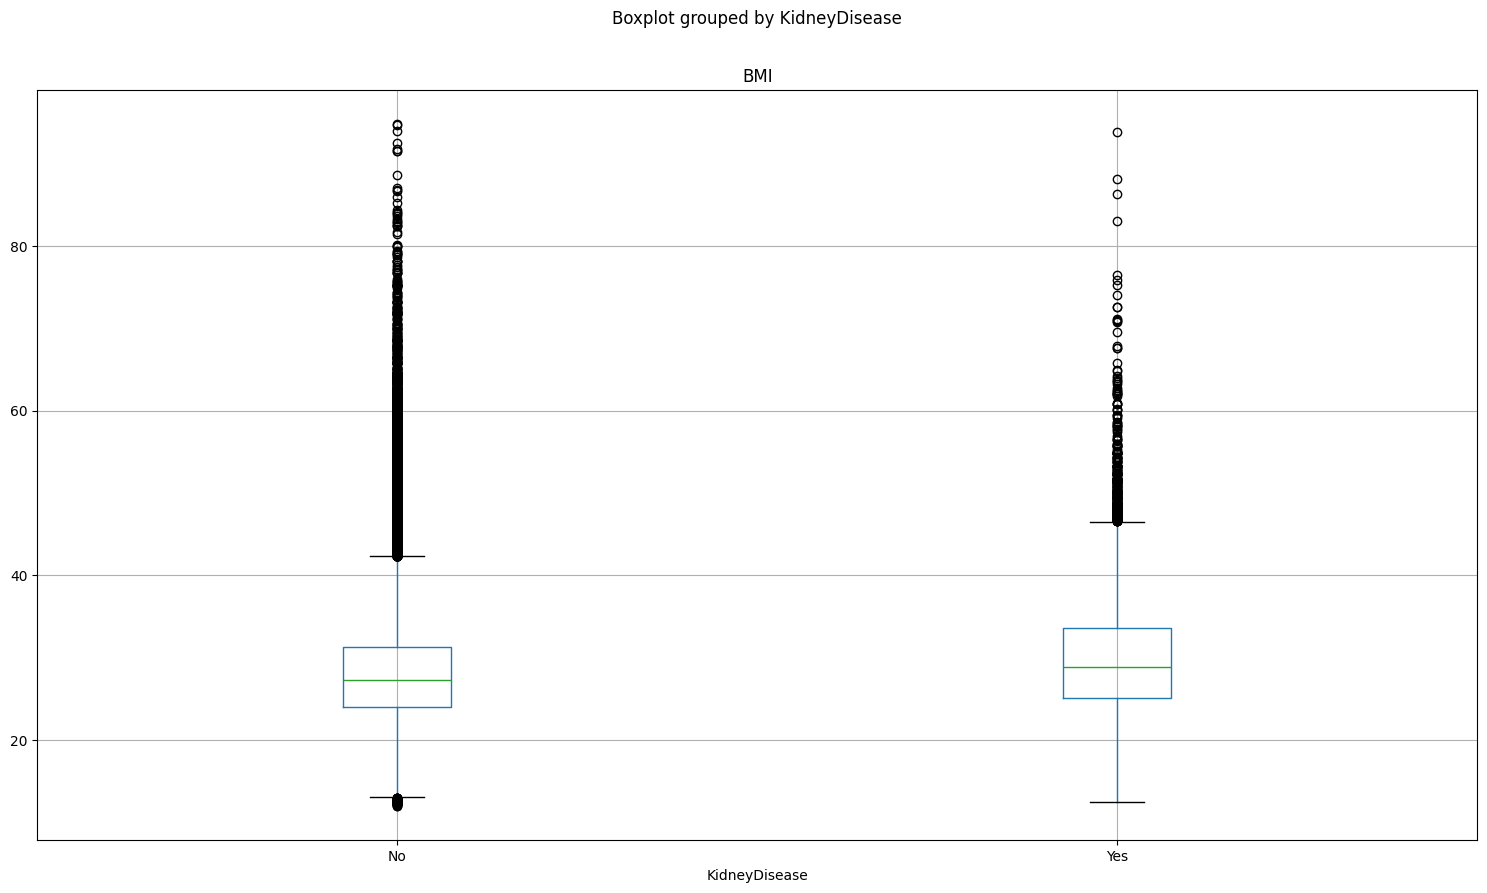

In [23]:
data.boxplot(column="BMI",by="KidneyDisease",figsize=(18,10))

In [24]:
import scipy.stats

from scipy.stats import f_oneway
def test(data, BMI, KidneyDisease):
    Group_data = [
            group[BMI].values for _, group in data.groupby(KidneyDisease)
    ]
    f_starts,p_value=f_oneway(*Group_data)
    if p_value > 0.05:
        print(f"{BMI} is not correlated with {KidneyDisease} with a p_value of {p_value}")
    elif p_value < 0.05:
        print(f"{BMI} is correlated with {KidneyDisease} with a p_value of {p_value}")
        
test(data, 'BMI','KidneyDisease')

BMI is correlated with KidneyDisease with a p_value of 1.7223211696873605e-181


FINDING THE RELATIONSHIP BETWEEN KIDNEY DISEASE AND AGECATEGORY

In [25]:
import scipy.stats as sp

In [31]:
#import the dataset and rename it
remedial = pd.read_csv("Assignment 4_Remedial (1).csv")
remedial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [32]:
#Visualizing the relationship between agecategory and kidneydisease
age_kidney = pd.crosstab(index = remedial['AgeCategory'], columns=remedial['KidneyDisease'])

from scipy.stats import chi2_contingency
chi_sq_result = chi2_contingency(age_kidney)
print(f"p_value is {chi_sq_result[1]}.")

p_value is 0.0.


From the above tests we notice that the p-values for both BMI and AgeCategory in relation to KidneyDisease are less than 0.05 which implies that both BMI and AgeCategory are correlated with KidneyDisease. Hence BMI and AgeCategory are key indicators of KidneyDisease.

   NUMBER 2 THE DISTRIBUTION OF PROBABILITY OF A HEALTH WORKER

In [34]:
#Finding the marginal probability of PhysicalHealth
bins_ph = [0, 5, 10, 15, 20, 25, 30, 35]
labels_ph = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35']

## create a new column with the binned data
data['PhysicalHealth'] = pd.cut(data['PhysicalHealth'], bins = bins_ph, labels=labels_ph, right=False)

## Calculate the Marginal Probabilities
ph_prob = data['PhysicalHealth'].value_counts(normalize=True).sort_index()
ph_prob

PhysicalHealth
0-5      0.828790
5-10     0.045682
10-15    0.028540
15-20    0.017070
20-25    0.012646
25-30    0.006267
30-35    0.061005
Name: proportion, dtype: float64

The distribution of the PhysicalHealth ptobabilities is not uniform

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

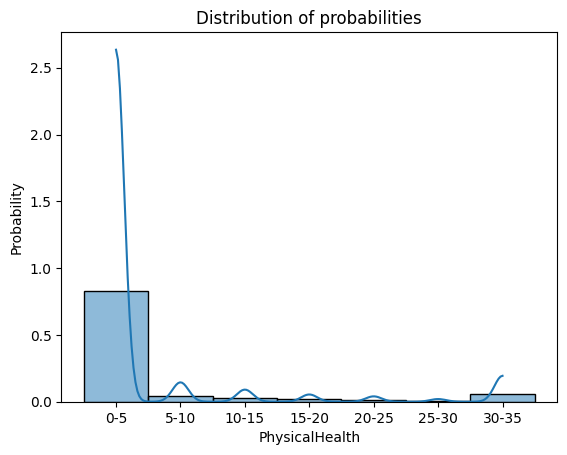

In [36]:
#Visualising the distribution
sns.histplot(data=data,x='PhysicalHealth',kde=True,stat='probability')
plt.title('Distribution of probabilities')
plt.show()

As we can see that the probabilities of PhysicalHealth are not normally

THE PROBABILITY THAT A PERSON WHO SMOKES HAS SKINCANCER(PROBABILITY A PERSON HAS SKIN CANCER GIVEN THEY SMOKE)

In [37]:
smoke = data[data['Smoking'] == 'Yes']
skincancer = data[data['SkinCancer'] == 'Yes']

#Event of both being female and  having a Y status
joint_event = data[(data['Smoking'] == 'Yes') & (data['SkinCancer'] == 'Yes')]

#Probability of both female and Y status
joint_prob = len(joint_event)/len(data)
joint_prob

smoke_prob = len(smoke)/len(data)
smoke_prob

conditional_probability = joint_prob/smoke_prob
print("The probability for a person smoking to have skin cancer is:", conditional_probability)

The probability for a person smoking to have skin cancer is: 0.10503532765260637


RELATIONSHIP BETWEEN BMI AND SLEEPTIME

<Axes: title={'center': 'SleepTime Vs BMI'}, xlabel='SleepTime', ylabel='BMI'>

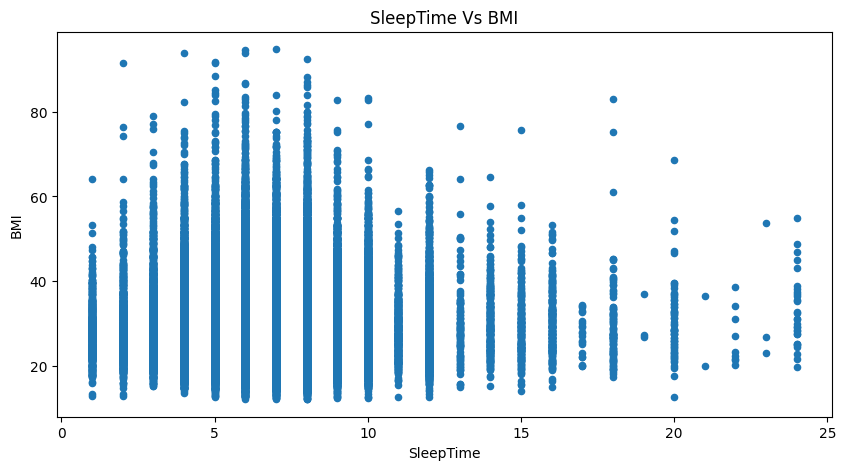

In [38]:
#Visualising the relationship between BMI and SleepTime using a scatterplot
data.plot.scatter(x='SleepTime', y='BMI', figsize=(10,5), title='SleepTime Vs BMI')

In [39]:
#Carrying out a statistical test
CorrelationData=data[['SleepTime', 'BMI']].corr()
CorrelationData

,SleepTime,BMI
SleepTime,1.000000,-0.051822
BMI,-0.051822,1.000000


There is a low negative correlation between Sleeptime and BMI

QN.5 BASED ON VARIABLE HEARTDISEASE WHICH GENHEALTH STATUS WOULD YOU ADVISE PATIENTS?

<Axes: xlabel='GenHealth'>

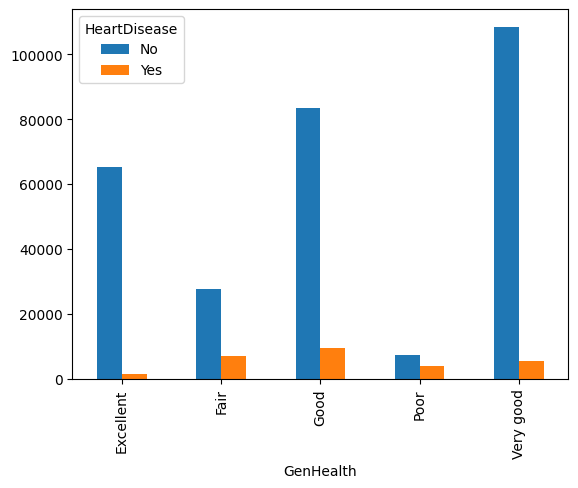

In [40]:
#Visualise the relationship between the two variables using a barplot 
CrosstabResult=pd.crosstab(index=data['GenHealth'],columns=data['HeartDisease'])
CrosstabResult

import matplotlib
%matplotlib inline
CrosstabResult.plot.bar()

I would advise  patients to maintain a very good health status since most patients with very good Genhealth have no HeartDisease